In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
hair = pd.read_csv('Predict Hair Fall.csv')

In [3]:
hair.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [9]:
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Genetics                   999 non-null    object
 1   Hormonal Changes           999 non-null    object
 2   Medical Conditions         999 non-null    object
 3   Medications & Treatments   999 non-null    object
 4   Nutritional Deficiencies   999 non-null    object
 5   Stress                     999 non-null    object
 6   Age                        999 non-null    int64 
 7   Poor Hair Care Habits      999 non-null    object
 8   Environmental Factors      999 non-null    object
 9   Smoking                    999 non-null    object
 10  Weight Loss                999 non-null    object
 11  Hair Loss                  999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB


At the beginning we can remove Id column, is useful for our analysis 

In [10]:
hair.drop('Id', axis = 1, inplace = True)

KeyError: "['Id'] not found in axis"

In [11]:
hair.describe()

,Age,Hair Loss
count,999.000000,999.000000
mean,34.188188,0.497497
std,9.377980,0.500244
min,18.000000,0.000000
25%,26.000000,0.000000
50%,34.000000,0.000000
75%,42.000000,1.000000
max,50.000000,1.000000


In [12]:
hair.isna().sum()

Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

We don't have any null values so work in this field is not required

In [17]:
count = hair.groupby('Hair Loss')['Hair Loss'].count()

In [22]:
is_bold = round(count[1] / len(hair) * 100, 2)
is_not_bold = round(count[0] / len(hair) * 100, 2)

([<matplotlib.patches.Wedge at 0x268f44024c0>,
 [Text(0.008639282738682042, 1.0999660734739782, 'Person is bold'),
  Text(-0.008639282738682176, -1.0999660734739782, 'Person is not bold')],
 [Text(0.004712336039281114, 0.5999814946221699, '49.8%'),
  Text(-0.004712336039281187, -0.5999814946221699, '50.2%')])

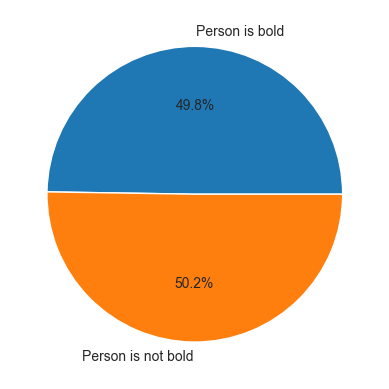

In [30]:
sns.set_style("whitegrid")
plt.pie([is_bold, is_not_bold], labels = ['Person is bold', 'Person is not bold'], autopct='%1.1f%%',)